In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<Axes: >

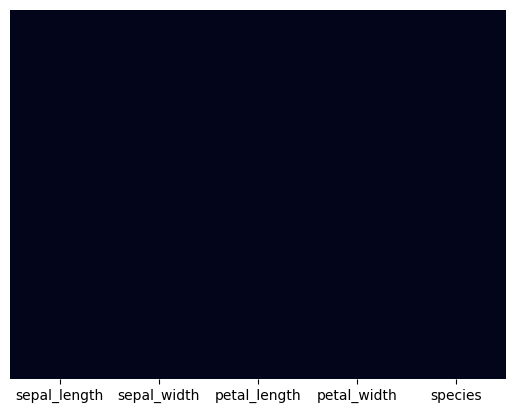

In [7]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [8]:
x=df.iloc[:,0:4]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y=df.iloc[:,4]
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [51]:
from sklearn.svm import SVC
model=SVC(C=7,kernel='poly')
model.fit(x_train,y_train)

SVC(C=7, kernel='poly')

In [52]:
print(model.score(x_train,y_train))

0.9904761904761905


In [53]:
pred=model.predict(x_train)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,pred)

array([[32,  0,  0],
       [ 0, 39,  1],
       [ 0,  0, 33]], dtype=int64)

In [54]:
print(model.score(x_test,y_test))
pred=model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)

0.9777777777777777


In [55]:
from sklearn.metrics import classification_report
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        18\n  versicolor       0.91      1.00      0.95        10\n   virginica       1.00      0.94      0.97        17\n\n    accuracy                           0.98        45\n   macro avg       0.97      0.98      0.97        45\nweighted avg       0.98      0.98      0.98        45\n'

<Axes: >

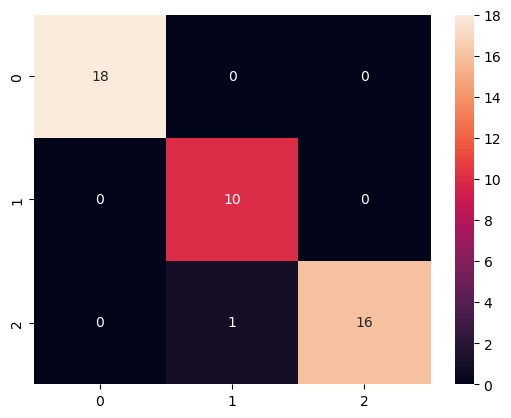

In [56]:
sns.heatmap(cm,annot=True)

In [77]:
df=pd.read_csv('Heart.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


<Axes: >

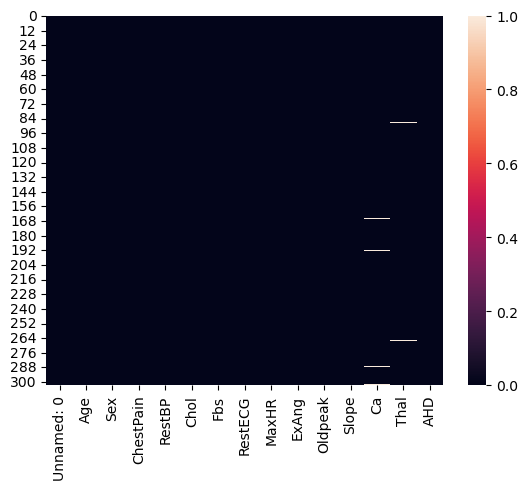

In [78]:
sns.heatmap(df.isnull())

In [79]:
df['AHD'].unique()

array(['No', 'Yes'], dtype=object)

In [80]:
df=df.drop('Unnamed: 0',axis=1)

In [86]:
df['ChestPain']=df['ChestPain'].astype('category')
df['ChestPain']=df['ChestPain'].cat.codes

df['Thal']=df['Thal'].astype('category')
df['Thal']=df['Thal'].cat.codes


df['AHD']=df['AHD'].astype('category')
df['AHD']=df['AHD'].cat.codes

df=df.drop('Ca',axis=1)
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,1,0
1,67,1,0,160,286,0,2,108,1,1.5,2,2,1
2,67,1,0,120,229,0,2,129,1,2.6,2,3,1
3,37,1,1,130,250,0,0,187,0,3.5,3,2,0
4,41,0,2,130,204,0,2,172,0,1.4,1,2,0


<Axes: >

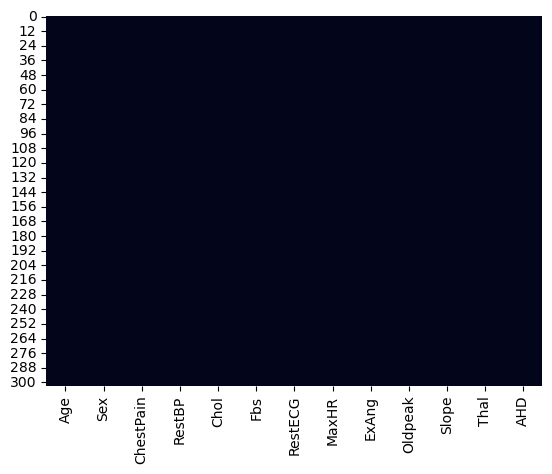

In [88]:
df.dropna()
sns.heatmap(df.isnull(),cbar=False)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    int8   
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Thal       303 non-null    int8   
 12  AHD        303 non-null    int8   
dtypes: float64(1), int64(9), int8(3)
memory usage: 24.7 KB


In [93]:
x=df.iloc[:,1:12]
x

,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Thal
0,1,3,145,233,1,2,150,0,2.3,3,1
1,1,0,160,286,0,2,108,1,1.5,2,2
2,1,0,120,229,0,2,129,1,2.6,2,3
3,1,1,130,250,0,0,187,0,3.5,3,2
4,0,2,130,204,0,2,172,0,1.4,1,2
...,...,...,...,...,...,...,...,...,...,...,...
298,1,3,110,264,0,0,132,0,1.2,2,3
299,1,0,144,193,1,0,141,0,3.4,2,3
300,1,0,130,131,0,0,115,1,1.2,2,3
301,0,2,130,236,0,2,174,0,0.0,2,2


In [95]:
y=df['AHD']
y.head()

0    0
1    1
2    1
3    0
4    0
Name: AHD, dtype: int8

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=21)

In [97]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()
cv=GridSearchCV(tree_model,param_grid=parameter,scoring='accuracy')

In [100]:
cv.fit(x_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [102]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [107]:
y_pred=cv.predict(x_test)

In [105]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
score

0.7377049180327869

In [109]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.65      0.95      0.77        58\n           1       0.92      0.55      0.69        64\n\n    accuracy                           0.74       122\n   macro avg       0.79      0.75      0.73       122\nweighted avg       0.79      0.74      0.73       122\n'

In [108]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[55,  3],
       [29, 35]], dtype=int64)

<Axes: >

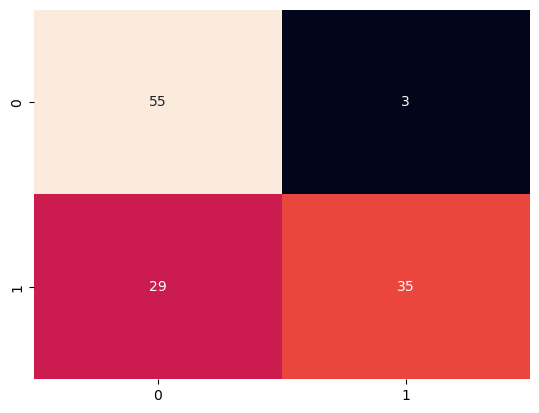

In [112]:
sns.heatmap(cm,annot=True,cbar=False)